<a href="https://colab.research.google.com/github/vineeth995/Master-Thesis/blob/main/GBT_without_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install eli5
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 5000)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import shap
from sklearn.inspection import permutation_importance
import eli5
sns.set()
import pickle


In [ ]:
!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip install -U pandas-profiling

import pandas_profiling as pp
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=3436a4fb88978c47b3969ba0329823172de71a1251865b51f980139a573fb0e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-voe6psg6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling
  Found existing installation: pandas-profiling 3.0.0
    Uninstalling pandas-profiling-3.0.0:
      Successfully uninstalled pandas-profiling-3.0.0


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/My Drive/House_Prices/immo_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_cat=pd.read_csv("/content/drive/My Drive/House_Prices/immo_data.csv")

In [ ]:
data_cat.iloc[4]

regio1                                                                 Bremen
serviceCharge                                                             138
heatingType                                    self_contained_central_heating
telekomTvOffer                                                            NaN
telekomHybridUploadSpeed                                                  NaN
newlyConst                                                              False
balcony                                                                  True
picturecount                                                               19
pricetrend                                                               2.46
telekomUploadSpeed                                                        NaN
totalRent                                                                 903
yearConstructed                                                          1950
scoutId                                                         

In [ ]:
data_cat=pd.read_csv("/content/drive/My Drive/House_Prices/immo_data.csv")
data_cat=data_cat.drop(['telekomHybridUploadSpeed','picturecount','scoutId','noParkSpaces','date','electricityKwhPrice','electricityBasePrice','description','street','streetPlain','houseNumber','telekomTvOffer','telekomUploadSpeed','lastRefurbish','energyEfficiencyClass','heatingCosts','regio3','facilities'
,'livingSpaceRange','noRoomsRange','baseRentRange','thermalChar','petsAllowed','geo_bln','geo_krs','serviceCharge','pricetrend','totalRent','yearConstructedRange','yearConstructed','firingTypes','regio1','regio2','numberOfFloors'],axis=1)
data_cat = data_cat.dropna(subset=['heatingType','newlyConst','balcony','hasKitchen','cellar','baseRent','livingSpace','condition','interiorQual','lift','typeOfFlat','geo_plz','noRooms','floor','garden'],inplace=False)

In [ ]:
data_cat.head(5)

heatingType  newlyConst  balcony  hasKitchen  cellar  \
0                  central_heating       False    False       False    True   
2                    floor_heating        True     True       False    True   
8                      oil_heating       False    False        True    True   
9   self_contained_central_heating       False    False       False    True   
13                 central_heating       False    False       False   False   

    baseRent  livingSpace                           condition   interiorQual  \
0      595.0        86.00                           well_kept         normal   
2      965.0        83.80                      first_time_use  sophisticated   
8      580.0        53.00                           well_kept  sophisticated   
9      300.0        60.00                           well_kept         normal   
13     950.0       123.44  first_time_use_after_refurbishment  sophisticated   

     lift    typeOfFlat  geo_plz  noRooms  floor  garden  
0   False  ground_floor    44269      4.0    1.0    True  
2    True     apartment     1097      3.0    3.0   False  
8   False   roof_storey    79211      2.0    2.0   False  
9   False     apartment    45888      2.5    2.0   False  
13  False     apartment    59065      4.0    4.0   False

In [ ]:
profile = ProfileReport(data_cat, title="Analysis of your Dataset")

In [ ]:
profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Run if you want encoding
#dont use for catboost
lbl_enc = LabelEncoder()
data_cat.loc[:, "heatingType"] = lbl_enc.fit_transform(data_cat.heatingType.values)
le_heating = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))

In [ ]:
data_cat.loc[:, "condition"] = lbl_enc.fit_transform(data_cat.condition.values)
le_condition = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))

In [ ]:
data_cat.loc[:, "interiorQual"] = lbl_enc.fit_transform(data_cat.interiorQual.values)
le_interiorQual = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))

In [ ]:
data_cat.loc[:, "typeOfFlat"] = lbl_enc.fit_transform(data_cat.typeOfFlat.values)
le_typeofflat = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))

In [ ]:
data_cat.loc[:, "geo_plz"] = lbl_enc.fit_transform(data_cat.geo_plz.values)
le_geo_plz = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))

In [ ]:
#if you want to encode enum values
def balkon(row):
    if row['balcony']==True:
        return 1
    elif row['balcony']==False:
        return 0    
    
def kitchen(row):
    if row['hasKitchen']==True:
        return 1
    elif row['hasKitchen']==False:
        return 0    
    
def cellar(row):
    if row['cellar']==True:
        return 1
    elif row['cellar']==False:
        return 0    
 
def lift(row):
    if row['lift']==True:
        return 1
    elif row['lift']==False:
        return 0

def garden(row):
    if row['garden']==True:
        return 1
    elif row['garden']==False:
        return 0 

def newlyConst(row):
    if row['newlyConst']==True:
      return 1
    else: 
      return 0  

data_cat['balcony']=data_cat.apply(lambda row: balkon(row),axis=1)
data_cat['hasKitchen']=data_cat.apply(lambda row: kitchen(row),axis=1)
data_cat['cellar']=data_cat.apply(lambda row: cellar(row),axis=1)
data_cat['lift']=data_cat.apply(lambda row: lift(row),axis=1)
data_cat['garden']=data_cat.apply(lambda row: garden(row),axis=1)
data_cat['newlyConst']=data_cat.apply(lambda row: newlyConst(row),axis=1)   

#data_cat['balcony'] = data_cat.noRooms.astype('int')
#data_cat['balcony'] = data_cat.floor.astype('category')
#data_cat['hasKitchen'] = data_cat.noRooms.astype('int')
#data_cat['hasKitchen'] = data_cat.floor.astype('category')
#data_cat['cellar'] = data_cat.noRooms.astype('int')
#data_cat['cellar'] = data_cat.floor.astype('category')
#data_cat['lift'] = data_cat.noRooms.astype('int')
#data_cat['lift'] = data_cat.floor.astype('category')
#data_cat['garden'] = data_cat.noRooms.astype('int')
#data_cat['garden'] = data_cat.floor.astype('category')
#data_cat['newlyConst'] = data_cat.noRooms.astype('int')
#data_cat['newlyConst'] = data_cat.floor.astype('category')

In [ ]:
#trimming extreme values
data_cat.drop(data_cat[(data_cat['baseRent'] > 8000) | (data_cat['baseRent'] < 100)].index, inplace = True ,axis = 0)
data_cat.drop(data_cat[(data_cat['livingSpace'] >= 2420) | (data_cat['livingSpace'] < 10)].index, inplace = True, axis = 0)
data_cat.drop(data_cat[(data_cat['livingSpace'] < 100) & (data_cat['baseRent'] > 4000)].index, inplace = True, axis = 0)
data_cat.drop(data_cat[(data_cat['noRooms'] > 15)].index, inplace = True, axis = 0)

In [ ]:
#setting floors as category 
data_cat['noRooms'] = data_cat.noRooms.astype('int')
data_cat['floor'] = data_cat.floor.astype('int')
data_cat['floor'] = data_cat.floor.astype('category')

In [ ]:
#splitting X and y variables
y_cat=data_cat['baseRent']
X_cat=data_cat.drop(['baseRent'],axis=1)

In [ ]:
#splitting into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat)

In [ ]:
gbt = GradientBoostingRegressor(max_depth=7)

In [ ]:
params = gbt.get_params()

In [ ]:
for key,value in params.items():
    print("%s : %s" %(key, value))

alpha : 0.9
ccp_alpha : 0.0
criterion : friedman_mse
init : None
learning_rate : 0.1
loss : ls
max_depth : 7
max_features : None
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_impurity_split : None
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 100
n_iter_no_change : None
presort : deprecated
random_state : None
subsample : 1.0
tol : 0.0001
validation_fraction : 0.1
verbose : 0
warm_start : False


In [ ]:
gbt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pkl_filename = "gbt.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gbt, file)

In [ ]:
y_calc=gbt.predict(X_train)
r2_score(y_train,y_calc)

0.9258909470197262

In [ ]:
y_calc=gbt.predict(X_test)
r2_score(y_test,y_calc)

0.8839020806119192

In [ ]:
mean_squared_error(y_test,y_calc)

In [ ]:
mean_absolute_error(y_train,y_calc)

87.55777131171644

In [ ]:
mean_absolute_error(y_test,y_calc)

99.7434720636697

# GBT Feature Importance

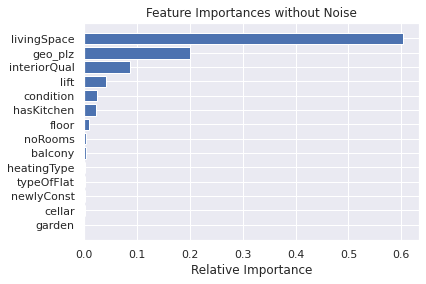

In [ ]:
features = X_train.columns
importances = gbt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances without Noise')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

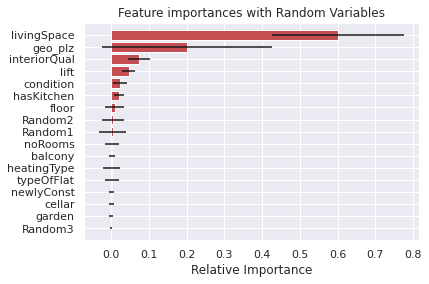

In [ ]:
importances = gbt.feature_importances_
features = X_train.columns
std = np.std([tree[0].feature_importances_ for tree in gbt.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances with Random Variables")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.ylim([-1, X_train.shape[1]])
plt.xlabel('Relative Importance')
plt.show()

# GBT Permutation Importance

In [ ]:
result = permutation_importance(gbt, X_test[1:100], y_test[1:100],n_repeats=30,random_state=0)

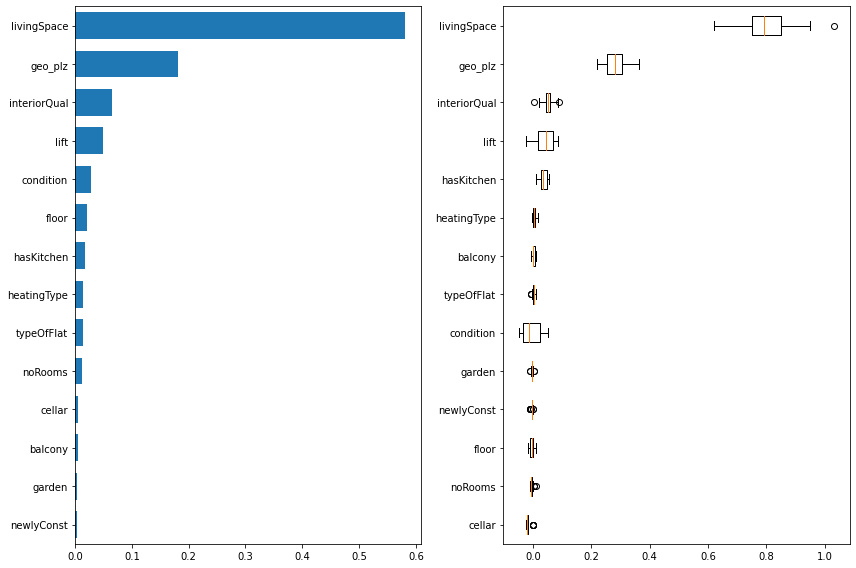

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(gbt.feature_importances_)
tree_indices = np.arange(0, len(gbt.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         gbt.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(gbt.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gbt, random_state=1).fit(X_train[1:100], y_train[1:100])
#eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
w = eli5.show_weights(perm, feature_names=X_train.columns.tolist())
result = pd.read_html(w.data)[0]
result

Weight       Feature
0    0.5740  ± 0.1792   livingSpace
1    0.4438  ± 0.2051       geo_plz
2    0.0419  ± 0.0165  interiorQual
3    0.0278  ± 0.0155          lift
4    0.0187  ± 0.0016    hasKitchen
5    0.0076  ± 0.0082   heatingType
6    0.0073  ± 0.0078     condition
7    0.0056  ± 0.0044       balcony
8    0.0052  ± 0.0026         floor
9    0.0019  ± 0.0041       noRooms
10   0.0016  ± 0.0022    newlyConst
11   0.0005  ± 0.0015    typeOfFlat
12  -0.0001  ± 0.0003        garden
13  -0.0004  ± 0.0027        cellar

In [ ]:
result['wt']=result['Weight'].apply(lambda x:float(x.split(' ')[0]))

In [ ]:
result

Weight       Feature      wt
0    0.5740  ± 0.1792   livingSpace  0.5740
1    0.4438  ± 0.2051       geo_plz  0.4438
2    0.0419  ± 0.0165  interiorQual  0.0419
3    0.0278  ± 0.0155          lift  0.0278
4    0.0187  ± 0.0016    hasKitchen  0.0187
5    0.0076  ± 0.0082   heatingType  0.0076
6    0.0073  ± 0.0078     condition  0.0073
7    0.0056  ± 0.0044       balcony  0.0056
8    0.0052  ± 0.0026         floor  0.0052
9    0.0019  ± 0.0041       noRooms  0.0019
10   0.0016  ± 0.0022    newlyConst  0.0016
11   0.0005  ± 0.0015    typeOfFlat  0.0005
12  -0.0001  ± 0.0003        garden -0.0001
13  -0.0004  ± 0.0027        cellar -0.0004

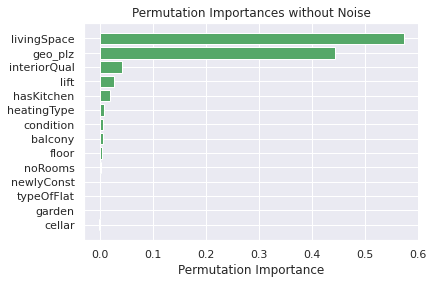

In [ ]:
plt.title('Permutation Importances without Noise')
plt.barh(result['Feature'], result['wt'], color='g', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

# GBT Shapley

In [ ]:
shap.initjs()
explainer_gbt = shap.TreeExplainer(gbt)
shap_values_gbt = explainer_gbt.shap_values(X_train)

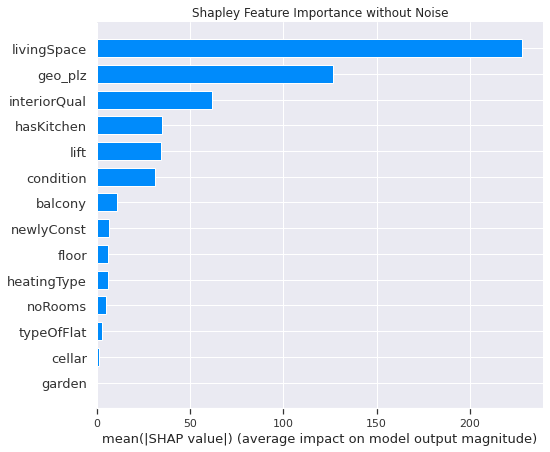

In [ ]:
plt.title('Shapley Feature Importance without Noise')
shap.summary_plot(shap_values_gbt, X_train, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(explainer_gbt.expected_value, shap_values_gbt[46658,:], X_train.iloc[46658,:])

In [ ]:
X_train.loc[(X_train['livingSpace'] == 33) & (X_train['geo_plz'] == 3699)]

heatingType  newlyConst  balcony  hasKitchen  cellar  livingSpace  \
34671            0           0        1           0       0         33.0   

       condition  interiorQual  lift  typeOfFlat  geo_plz  noRooms floor  \
34671          9             1     1           0     3699        1     2   

       garden  
34671       0

In [ ]:
 result =X_train[(X_train.livingSpace == 33) & (X_train.geo_plz == 3699)]

In [ ]:
X_train.loc[(X_train.livingSpace == 33) & (X_train.geo_plz == 3699)]

heatingType  newlyConst  balcony  hasKitchen  cellar  livingSpace  \
34671            0           0        1           0       0         33.0   

       condition  interiorQual  lift  typeOfFlat  geo_plz  noRooms floor  \
34671          9             1     1           0     3699        1     2   

       garden  
34671       0

In [ ]:
X_train.index.get_loc(result.iloc[0].name)

46658

In [ ]:
result =data_cat[(data_cat.livingSpace == 33) & (data_cat.geo_plz == 3699)]
data_cat.index.get_loc(result.iloc[0].name)

13507

In [ ]:
data_cat.iloc[13507]

heatingType        0.0
newlyConst         0.0
balcony            1.0
hasKitchen         0.0
cellar             0.0
baseRent         495.0
livingSpace       33.0
condition          9.0
interiorQual       1.0
lift               1.0
typeOfFlat         0.0
geo_plz         3699.0
noRooms            1.0
floor              2.0
garden             0.0
Name: 34671, dtype: float64

In [ ]:
X_train.iloc[46658]

heatingType        0.0
newlyConst         0.0
balcony            1.0
hasKitchen         0.0
cellar             0.0
livingSpace       33.0
condition          9.0
interiorQual       1.0
lift               1.0
typeOfFlat         0.0
geo_plz         3699.0
noRooms            1.0
floor              2.0
garden             0.0
Name: 34671, dtype: float64

In [ ]:
shap_frame=X_train.iloc[1000,:].to_frame()

In [ ]:
shap_frame=shap_frame.reset_index()

In [ ]:
shap_frame.columns=[ 'Column Name','Encoded Name']

In [ ]:
shap_frame.head(20)

Column Name  Encoded Name Original Variable
0    heatingType             0   central_heating
1     newlyConst             0             False
2        balcony             1              True
3     hasKitchen             0             False
4         cellar             0             False
5    livingSpace            33                33
6      condition             9         well_kept
7   interiorQual             1            normal
8           lift             1              True
9     typeOfFlat             0         apartment
10       geo_plz          3699             63065
11       noRooms             1                 1
12         floor             2                 2
13        garden             0             False
14        Noise1         13520             13520
15        Noise2           277            277.14
16        Noise3             1                 1

In [ ]:
shap_frame['Original Variable']= pd.Series(['central_heating','False','True','False','False','33','well_kept','normal','True','apartment','63065','1','2','False','13520','277.14','1'])

In [ ]:
shap_frame['Encoded Name']=shap_frame['Encoded Name'].astype(np.int64)

In [ ]:
shap_frame.loc[5].at['Encoded Name'] = 96.21

In [ ]:
shap_frame['Encoded Name'].loc[5:5]= 96.21


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#shap_frame['5']['Encoded Name'] = 96.21
shap_frame=shap_frame.at['livingSpace', 'Encoded Name']=96.21
df.set_value('C', 'x', 10)
df.loc[5].at['B']

AttributeError: ignored

#Mapping

In [ ]:
le_heating

{'central_heating': 0,
 'combined_heat_and_power_plant': 1,
 'district_heating': 2,
 'electric_heating': 3,
 'floor_heating': 4,
 'gas_heating': 5,
 'heat_pump': 6,
 'night_storage_heater': 7,
 'oil_heating': 8,
 'self_contained_central_heating': 9,
 'solar_heating': 10,
 'stove_heating': 11,
 'wood_pellet_heating': 12}

In [ ]:
le_condition

{'first_time_use': 0,
 'first_time_use_after_refurbishment': 1,
 'fully_renovated': 2,
 'mint_condition': 3,
 'modernized': 4,
 'need_of_renovation': 5,
 'negotiable': 6,
 'refurbished': 7,
 'ripe_for_demolition': 8,
 'well_kept': 9}

In [ ]:
le_interiorQual

{'luxury': 0, 'normal': 1, 'simple': 2, 'sophisticated': 3}

In [ ]:
le_typeofflat

{'apartment': 0,
 'ground_floor': 1,
 'half_basement': 2,
 'loft': 3,
 'maisonette': 4,
 'other': 5,
 'penthouse': 6,
 'raised_ground_floor': 7,
 'roof_storey': 8,
 'terraced_flat': 9}

In [ ]:
le_geo_plz
for key, value in le_geo_plz.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if value == 3699:
        print(key)

63065



# Subset Decision Tree

In [ ]:
data_cat.head(10)

heatingType  newlyConst  balcony  hasKitchen  cellar  baseRent  \
0             0           0        0           0       1    595.00   
2             4           1        1           0       1    965.00   
8             8           0        0           1       1    580.00   
9             9           0        0           0       1    300.00   
13            0           0        0           0       0    950.00   
14            5           1        1           0       1    972.60   
17            0           0        0           0       0    200.00   
19            2           0        1           0       1   1343.48   
20            0           0        1           0       1   1150.00   
24            0           0        1           0       1    620.00   

    livingSpace  condition  interiorQual  lift  typeOfFlat  geo_plz  noRooms  \
0         86.00          9             1     0           1     2619        4   
2         83.80          0             3     1           0        4        3   
8         53.00          9             3     0           8     4903        2   
9         60.00          9             1     0           0     2752        2   
13       123.44          1             3     0           0     3560        4   
14        87.00          0             3     1           1     2615        3   
17        50.00          7             1     0           8      259        2   
19       127.95          3             3     1           0     2198        5   
20       160.00          9             3     0           1     1449        4   
24        55.89          2             1     0           0     1258        3   

   floor  garden  
0      1       1  
2      3       0  
8      2       0  
9      2       0  
13     4       0  
14     0       0  
17     3       1  
19     1       0  
20     0       1  
24     2       0

In [ ]:
#splitting X and y variables
y_dec=data_cat['baseRent']
X_dec=data_cat.drop(['baseRent'],axis=1)

In [ ]:
X_dec=X_dec[['livingSpace', 'geo_plz', 'condition', 'hasKitchen', ]]

In [ ]:
#splitting into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dec, y_dec)

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7343244304915848

In [ ]:
y_pred = regressor.predict(X_train)
r2_score(y_train, y_pred)

0.9997537747527614

# Main Decision Tree

In [ ]:
#splitting X and y variables
y=data_cat['baseRent']
X=data_cat.drop(['baseRent'],axis=1)

In [ ]:
X.head(10)

heatingType  newlyConst  balcony  hasKitchen  cellar  livingSpace  \
0             0           0        0           0       1        86.00   
2             4           1        1           0       1        83.80   
8             8           0        0           1       1        53.00   
9             9           0        0           0       1        60.00   
13            0           0        0           0       0       123.44   
14            5           1        1           0       1        87.00   
17            0           0        0           0       0        50.00   
19            2           0        1           0       1       127.95   
20            0           0        1           0       1       160.00   
24            0           0        1           0       1        55.89   

    condition  interiorQual  lift  typeOfFlat  geo_plz  noRooms floor  garden  \
0           9             1     0           1     2619        4     1       1   
2           0             3     1           0        4        3     3       0   
8           9             3     0           8     4903        2     2       0   
9           9             1     0           0     2752        2     2       0   
13          1             3     0           0     3560        4     4       0   
14          0             3     1           1     2615        3     0       0   
17          7             1     0           8      259        2     3       1   
19          3             3     1           0     2198        5     1       0   
20          9             3     0           1     1449        4     0       1   
24          2             1     0           0     1258        3     2       0   

    Random1  Random2  Random3  
0         0      202        1  
2         1      224        0  
8         2      115        1  
9         3       56        1  
13        4      282        1  
14        5      284        1  
17        6       73        1  
19        7      279        1  
20        8      235        1  
24        9      171        1

In [ ]:
X=X[['livingSpace','geo_plz','interiorQual','condition']]

In [ ]:
#splitting into testing and training sets
from sklearn.model_selection import train_test_split
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X, y)

In [ ]:
regressor_main = DecisionTreeRegressor()
regressor_main.fit(X_train_main, y_train_main)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_main = regressor_main.predict(X_test_main)
r2_score(y_test_main, y_pred_main)

0.6993093719299043

In [ ]:
y_pred_main = regressor_main.predict(X_train_main)
r2_score(y_train_main, y_pred_main)

1.0

#Important Variables

In [ ]:
FI=[features[i] for i in indices]
FI.reverse()
FI[0:7]

['livingSpace',
 'geo_plz',
 'interiorQual',
 'lift',
 'condition',
 'hasKitchen',
 'floor']

In [ ]:
w = eli5.show_weights(perm, feature_names=X_train.columns.tolist())
result = pd.read_html(w.data)[0]
result
a=result['Feature'].head(7)
PFI=a.to_list()
PFI

['livingSpace',
 'geo_plz',
 'interiorQual',
 'lift',
 'hasKitchen',
 'heatingType',
 'condition']

In [ ]:
shap_sum = np.abs(shap_values_gbt).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df
importance_df['column_name'].head(6)
list_of_sv = importance_df['column_name'].head(7)
SV = list_of_sv.to_list()
SV

['livingSpace',
 'geo_plz',
 'interiorQual',
 'hasKitchen',
 'lift',
 'condition',
 'balcony']

In [ ]:
Final = list(set(FI) & set(PFI) & set(SV))
Final

['livingSpace', 'geo_plz', 'condition', 'hasKitchen', 'interiorQual', 'lift']